In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

DATA = pd.read_csv("Desktop/unknown/WBSWLift.csv")  
DATA.columns = DATA.columns.str.upper()

print(DATA.isnull().sum())
DATA = DATA.fillna(DATA.mean(numeric_only=True))

STATE_NAME                                                  0
DISTRICT_NAME                                               0
BLOCK_TEHSIL_NAME                                           0
VILLAGE_NAME                                                0
S_NO_OF_SCHEME                                              0
REF_SCHEME_TYPE_SURFACE_LIFT_NAME                           0
REF_SCHEME_OWNER_NAME                                       0
TOTAL_OWNERS_HOLDING                                    16174
REF_SCHEME_OWNER_SOCIAL_STATUS_NAME                     16174
GENDER_NAME                                             16174
COMMISSIONING_PERIOD_DISPLAY                                0
SCHEME_CONSTRUCTION_COST                                    0
SCHEME_MACHINERY_COST                                       0
SCHEME_MAINTAINENCE_COST                                    0
FINANCE_SOURCE_NAME                                     16174
FINANCE_SOURCE_NAME2                                    21937
CONSTRUC

In [9]:
print(DATA.describe())

avg_construction_cost = DATA['SCHEME_CONSTRUCTION_COST'].mean()
avg_machinery_cost = DATA['SCHEME_MACHINERY_COST'].mean()
avg_maintenance_cost = DATA['SCHEME_MAINTAINENCE_COST'].mean()

print(f"\nAverage Construction Cost: ₹{avg_construction_cost:.2f}")
print(f"Average Machinery Cost: ₹{avg_machinery_cost:.2f}")
print(f"Average Maintenance Cost: ₹{avg_maintenance_cost:.2f}")

avg_costs = [avg_construction_cost, avg_machinery_cost, avg_maintenance_cost]
labels = ['Construction Cost', 'Machinery Cost', 'Maintenance Cost']



       S_NO_OF_SCHEME  TOTAL_OWNERS_HOLDING  SCHEME_CONSTRUCTION_COST  \
count    21937.000000          21937.000000              2.193700e+04   
mean        13.272781              0.670857              2.539633e+05   
std         48.872254              0.472611              2.282975e+05   
min          1.000000              0.010000              0.000000e+00   
25%          1.000000              0.670857              3.850000e+04   
50%          3.000000              0.670857              2.850000e+05   
75%          8.000000              0.670857              3.500000e+05   
max        573.000000              9.630000              1.900000e+06   

       SCHEME_MACHINERY_COST  SCHEME_MAINTAINENCE_COST  FINANCE_SOURCE_NAME2  \
count           21937.000000              21937.000000                   0.0   
mean            28272.372749              10700.619137                   NaN   
std             49961.699457              26156.015604                   NaN   
min                 0.

In [ ]:

plt.figure(figsize=(7, 7))
plt.pie(avg_costs, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Average Cost Contribution')
plt.show()

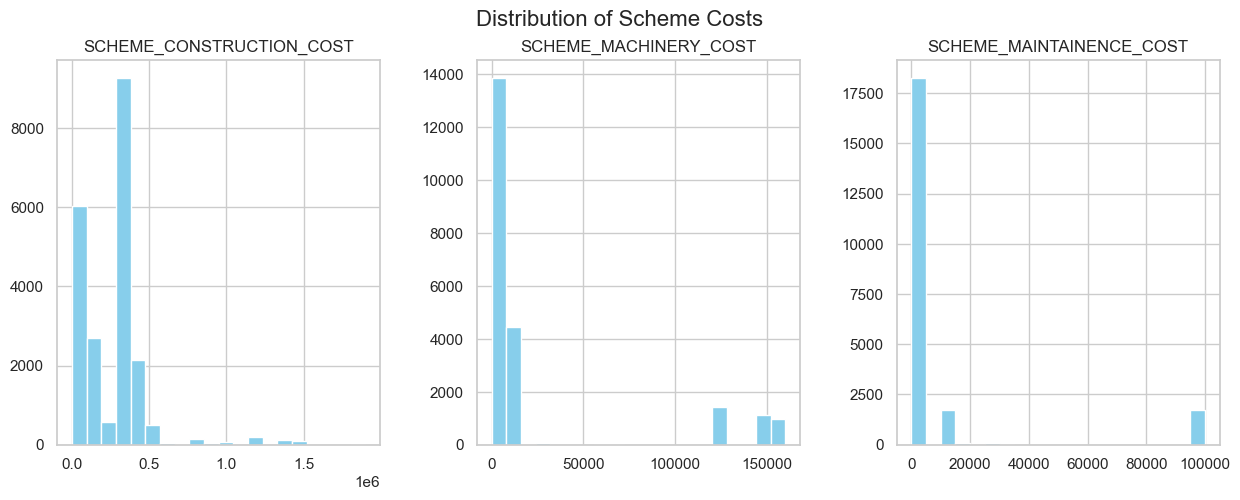

In [54]:

COST_COLUMNS = ["SCHEME_CONSTRUCTION_COST", "SCHEME_MACHINERY_COST", "SCHEME_MAINTAINENCE_COST"]
DATA[COST_COLUMNS].describe()
DATA[COST_COLUMNS].hist(bins=20, figsize=(15, 5), layout=(1, 3), color='skyblue')
plt.suptitle("Distribution of Scheme Costs", fontsize=16)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21937 entries, 0 to 21936
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CONSTRUCTION_SUBSIDY  21937 non-null  int64
 1   MACHINERY_SUBSIDY     21937 non-null  int64
dtypes: int64(2)
memory usage: 342.9 KB


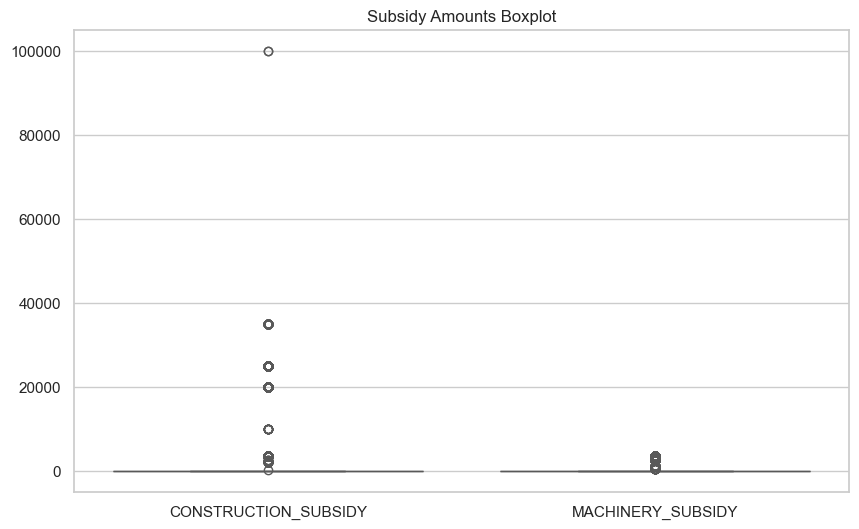

In [56]:

SUBSIDY_COLUMNS = ["CONSTRUCTION_SUBSIDY", "MACHINERY_SUBSIDY"]
DATA[SUBSIDY_COLUMNS].info()
DATA[SUBSIDY_COLUMNS].describe()
sns.boxplot(data=DATA[SUBSIDY_COLUMNS], palette="Set2")
plt.title("Subsidy Amounts Boxplot")
plt.show()



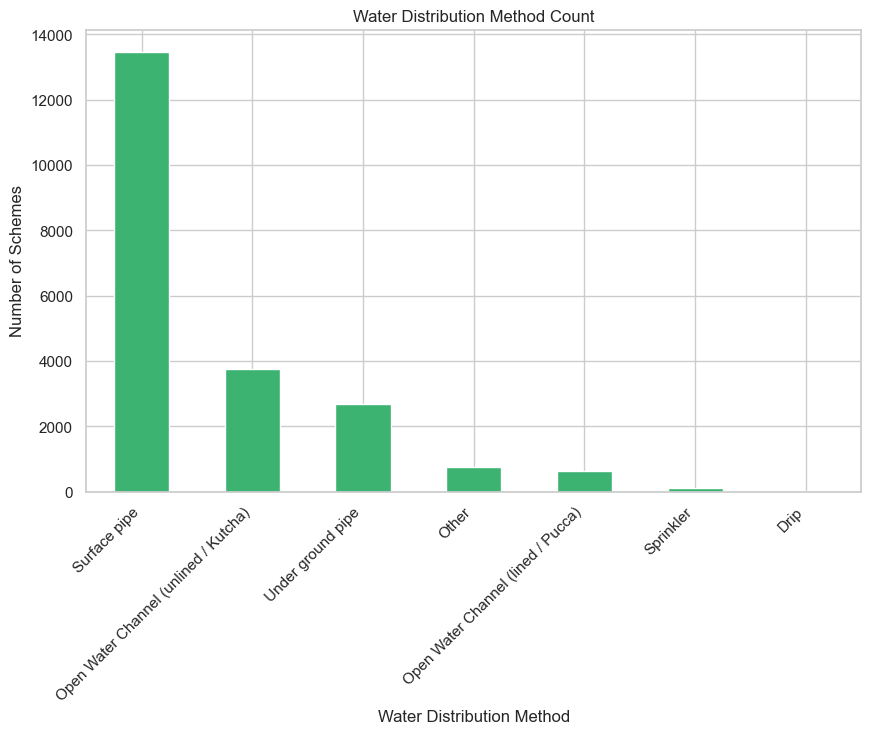

In [58]:
# VALUE COUNTS
WATER_DISTRIBUTION = DATA["WATER_DISTRIBUTION_METHOD_NAME"].value_counts()

# PLOTTING
WATER_DISTRIBUTION.plot(kind="bar", color="mediumseagreen")
plt.title("Water Distribution Method Count")
plt.xlabel("Water Distribution Method")
plt.ylabel("Number of Schemes")
plt.xticks(rotation=45, ha='right')
plt.show()



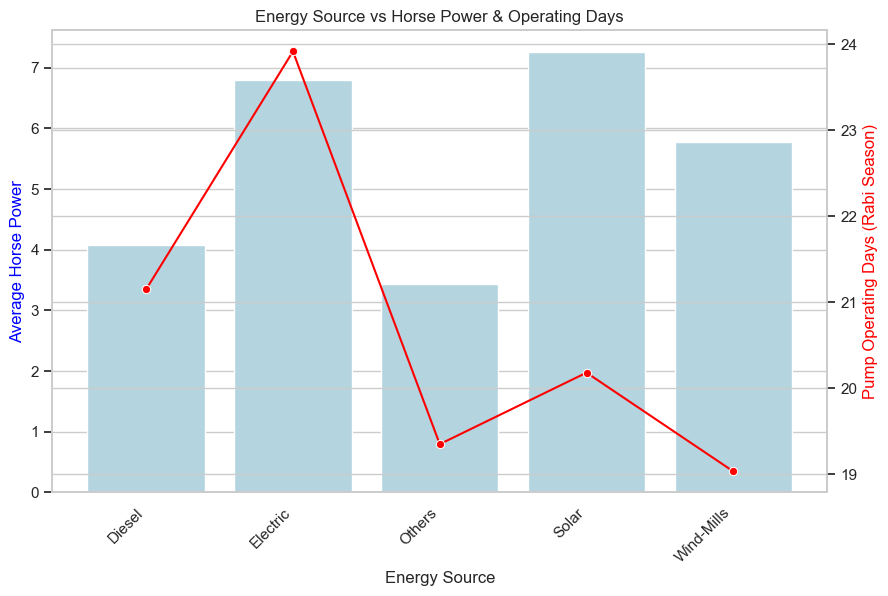

In [60]:

LIFTING_TRENDS = DATA.groupby("LIFTING_DEVICE_ENRGY_SOURCE_NAME").agg({
    "HORSE_POWER_OF_LIFTING_DEVICE": "mean",
    "PUMP_OPERATING_DAYS_RABI_SEASON": "mean"
}).reset_index()
fig, ax1 = plt.subplots()

sns.barplot(
    data=LIFTING_TRENDS,
    x="LIFTING_DEVICE_ENRGY_SOURCE_NAME",
    y="HORSE_POWER_OF_LIFTING_DEVICE",
    color="lightblue",
    ax=ax1
)
ax1.set_ylabel("Average Horse Power", color="blue")
ax1.set_xlabel("Energy Source")
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()
sns.lineplot(
    data=LIFTING_TRENDS,
    x="LIFTING_DEVICE_ENRGY_SOURCE_NAME",
    y="PUMP_OPERATING_DAYS_RABI_SEASON",
    color="red",
    marker="o",
    ax=ax2
)
ax2.set_ylabel("Pump Operating Days (Rabi Season)", color="red")

plt.title("Energy Source vs Horse Power & Operating Days")
plt.show()



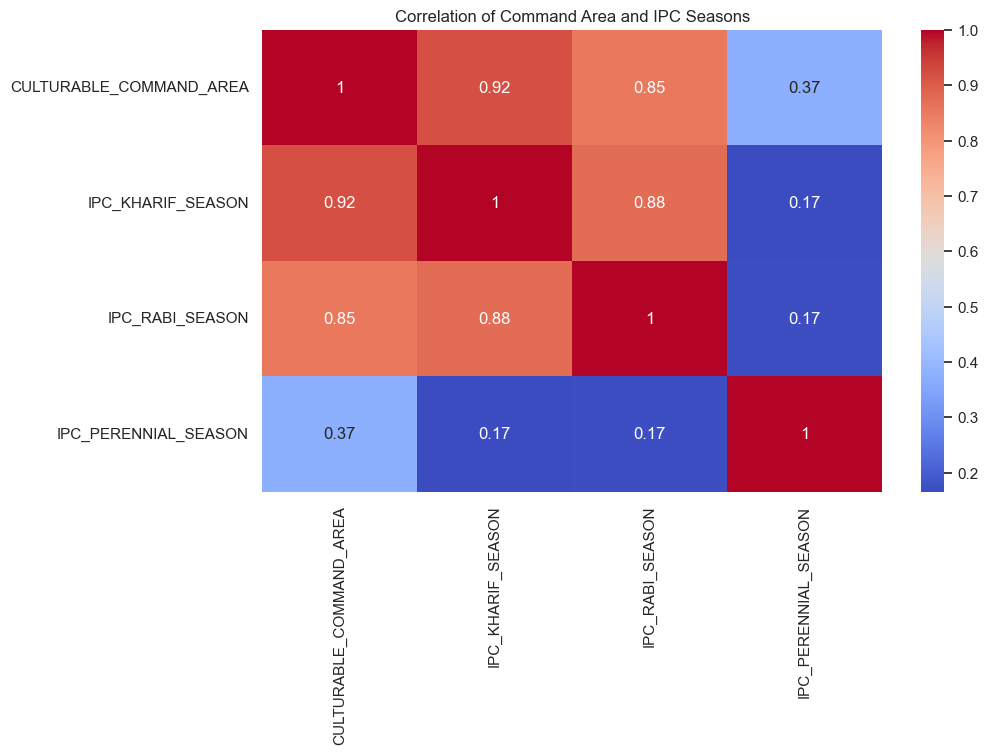

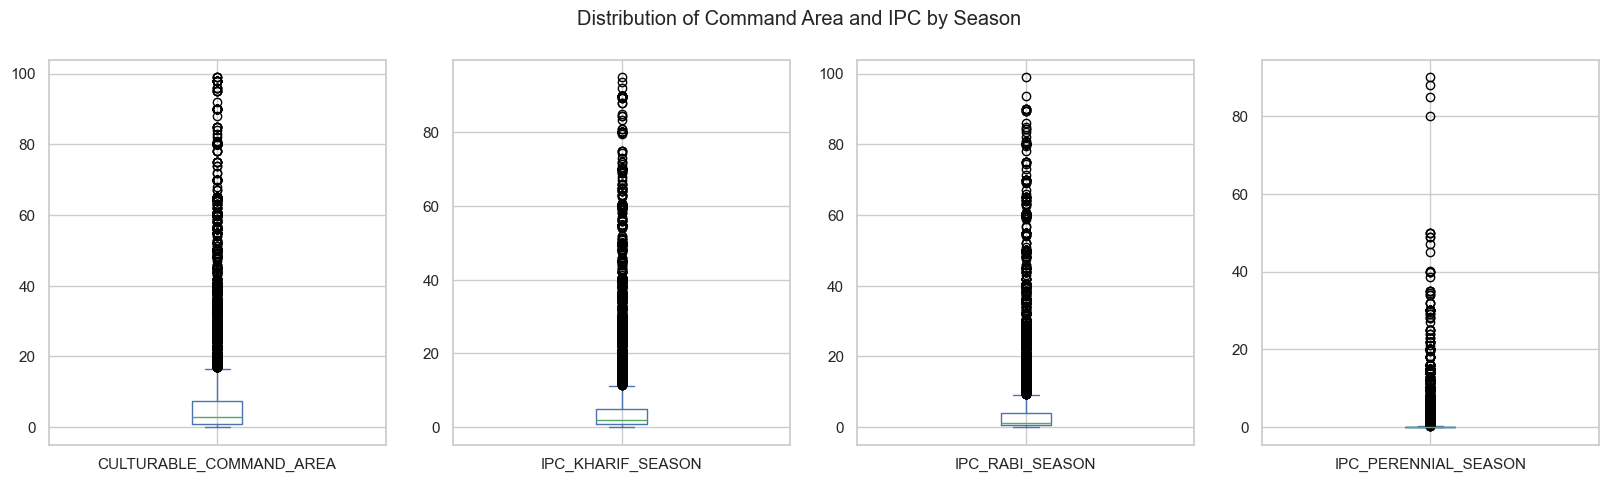

In [62]:

COMMAND_AREA_ANALYSIS = DATA[[
    "CULTURABLE_COMMAND_AREA",
    "IPC_KHARIF_SEASON",
    "IPC_RABI_SEASON",
    "IPC_PERENNIAL_SEASON"
]]
COMMAND_AREA_ANALYSIS.describe()

sns.heatmap(COMMAND_AREA_ANALYSIS.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Command Area and IPC Seasons")
plt.show()
COMMAND_AREA_ANALYSIS.plot(kind='box', subplots=True, layout=(1, 4), sharey=False, figsize=(20, 5))
plt.suptitle("Distribution of Command Area and IPC by Season")
plt.show()

